### Set the unique seed

In [1]:
import random
random.seed(12721667)

In [ ]:
#!pip install prince

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,RocCurveDisplay,mean_squared_error,plot_roc_curve,roc_curve,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
#from prince import FAMD

### Import the dataset

In [3]:
df = pd.read_csv("musicData.csv")
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [4]:
len(df) - df.count()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

### Drop rows that have missing values 

In [5]:
df = df.dropna()

In [6]:
df.shape

(50000, 18)

In [7]:
len(df) - df.count()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [8]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [9]:
df = df.reset_index(drop=True)

### Check that no 0 or neg values in "tempo" column, so we can replace "?" with 0


In [10]:
small = 0
for i in range(df.shape[0]):
    if df['tempo'][i] == '?':
        continue
    else:
        if float(df['tempo'][i]) <=0 :
            small+=1
small


0

In [ ]:
#key_encode = {'C':0,'C#':1,'D':2,'D#':3,'E':4,'F':5,'F#':6,'G':7,'G#':8,'A':9,'A#':10,'B':11}

In [11]:
#df = df.replace({'key':key_encode})
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### Drop linguistic columns, date, and id



In [12]:
df = df.drop(['artist_name','track_name','obtained_date','instance_id'],1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [13]:
df = df.reset_index(drop=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


### Encode "Mode" as dummy binary varaible 

In [14]:
df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre          object
dtype: object

In [15]:
#mode_encode = {'Minor':0,'Major':1}
#df = df.replace({'mode':mode_encode})
#df.head()

In [16]:
genre_encode = {'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,'Blues':6, 'Rock':7, 'Classical':8, 'Hip-Hop':9}
#df = df.replace({'music_genre':genre_encode})
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [17]:
df['tempo'].replace({'?':'0'},inplace=True)

In [18]:
df = df.astype({'tempo':float})

In [19]:
df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

### Imputation

In [20]:
for col in df.columns:
    if df[col].dtypes != object:        #if it's numerical 
        if col == 'tempo':              #if it's tempo, replace 0 with mean
            df[col].replace({0:df[col].mean()},inplace=True)
        else:           #if it's not tempo, replace NA with mean
            df[col].fillna((df[col].mean()), inplace=True)
        
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,Hip-Hop
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


In [21]:
df.reset_index(inplace=True,drop=True)

In [22]:
df = df.replace({'music_genre':genre_encode})
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.028,0.330,9
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.043,0.113,9
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,9
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,9


In [23]:
y = df['music_genre']

In [24]:
#data = df.to_numpy()
#X = data[:,:-1]
#y = data[:,-1]

### One-hot encoding

In [25]:
key_hot = pd.get_dummies(df['key'])
df_beforeKey = df.iloc[:,:6]
mode_hot = pd.get_dummies(df['mode'])
df_keyAmode = df.iloc[:,7:9]
df_afterMode = df.iloc[:,10:13]


In [26]:
df = df_beforeKey.join(key_hot)
df = df.join(df_keyAmode)
df = df.join(mode_hot)
df = df.join(df_afterMode)

In [27]:
df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,A,A#,B,C,...,F#,G,G#,liveness,loudness,Major,Minor,speechiness,tempo,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0,1,0,0,...,0,0,0,0.115,-5.201,0,1,0.0748,100.889,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0,0,0,0,...,0,0,0,0.124,-7.043,0,1,0.0300,115.002,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0,0,0,0,...,0,0,1,0.534,-4.617,1,0,0.0345,127.994,0.333
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0,0,0,0,...,0,0,0,0.157,-4.498,1,0,0.2390,128.014,0.270
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0,0,0,0,...,1,0,0,0.157,-6.266,1,0,0.0413,145.036,0.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0,0,0,0,...,0,0,0,0.119,-7.022,1,0,0.2980,98.028,0.330
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0,0,1,0,...,0,0,0,0.109,-9.814,1,0,0.0550,122.043,0.113
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0,0,0,0,...,0,0,0,0.143,-5.443,1,0,0.1460,131.079,0.395
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0,0,0,0,...,0,1,0,0.106,-5.016,0,1,0.0441,75.886,0.354


In [28]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F',
       'F#', 'G', 'G#', 'liveness', 'loudness', 'Major', 'Minor',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

### Train-Test split

In [29]:
random_500 = list()

for i in range(10):
    random.seed(12721667)
    random_500.append(random.sample([x for x in range(i*5000,(i+1)*5000-1)],500))

len(random_500)

10

In [30]:
testing_indices = []
for lst in random_500:
    for idx in lst:
        testing_indices.append(idx)
len(testing_indices)

5000

In [31]:
test_df = df.iloc[testing_indices].reset_index(drop=True)            #X and y are both in df format
test_df

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,A,A#,B,C,...,F#,G,G#,liveness,loudness,Major,Minor,speechiness,tempo,valence
0,28.0,0.00197,0.597,256288.0,0.965,0.031900,0,0,0,1,...,0,0,0,0.4850,-2.549,0,1,0.0501,159.936,0.640
1,48.0,0.00457,0.769,194469.0,0.914,0.637000,1,0,0,0,...,0,0,0,0.5650,-5.032,1,0,0.1200,125.879,0.179
2,29.0,0.02300,0.626,338175.0,0.979,0.555000,0,0,0,0,...,1,0,0,0.1570,-8.339,1,0,0.0927,118.688,0.188
3,33.0,0.03050,0.667,239701.0,0.742,0.754000,0,0,1,0,...,0,0,0,0.0947,-10.722,0,1,0.0424,120.029,0.102
4,32.0,0.00190,0.598,280800.0,0.966,0.014800,0,0,0,0,...,0,0,0,0.5630,-2.087,0,1,0.1480,99.961,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,56.0,0.00132,0.787,242107.0,0.671,0.000000,0,0,0,0,...,0,0,0,0.0783,-5.308,0,1,0.0906,81.897,0.637
4996,54.0,0.13900,0.616,330507.0,0.641,0.000000,0,0,0,0,...,0,0,1,0.0958,-7.275,0,1,0.0938,82.730,0.680
4997,58.0,0.30800,0.684,100009.0,0.785,0.000027,0,0,1,0,...,0,0,0,0.1500,-3.903,1,0,0.2740,143.840,0.486
4998,72.0,0.15000,0.915,137174.0,0.692,0.000120,1,0,0,0,...,0,0,0,0.0964,-7.544,1,0,0.0857,118.981,0.713


In [32]:
train_df = df.drop(testing_indices,0).reset_index(drop=True)
train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,A,A#,B,C,...,F#,G,G#,liveness,loudness,Major,Minor,speechiness,tempo,valence
0,27.0,0.00468,0.652,-1.0,0.941,0.7920,0,1,0,0,...,0,0,0,0.115,-5.201,0,1,0.0748,100.889000,0.759
1,31.0,0.01270,0.622,218293.0,0.890,0.9500,0,0,0,0,...,0,0,0,0.124,-7.043,0,1,0.0300,115.002000,0.531
2,28.0,0.00306,0.620,215613.0,0.755,0.0118,0,0,0,0,...,0,0,1,0.534,-4.617,1,0,0.0345,127.994000,0.333
3,32.0,0.00465,0.638,222369.0,0.587,0.9090,0,0,0,0,...,1,0,0,0.157,-6.266,1,0,0.0413,145.036000,0.323
4,47.0,0.00523,0.755,519468.0,0.731,0.8540,0,0,0,0,...,0,0,0,0.216,-10.517,0,1,0.0412,108.005646,0.614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,59.0,0.03340,0.913,-1.0,0.574,0.0000,0,0,0,0,...,0,0,0,0.119,-7.022,1,0,0.2980,98.028000,0.330
44996,72.0,0.15700,0.709,251860.0,0.362,0.0000,0,0,1,0,...,0,0,0,0.109,-9.814,1,0,0.0550,122.043000,0.113
44997,51.0,0.00597,0.693,189483.0,0.763,0.0000,0,0,0,0,...,0,0,0,0.143,-5.443,1,0,0.1460,131.079000,0.395
44998,65.0,0.08310,0.782,262773.0,0.472,0.0000,0,0,0,0,...,0,1,0,0.106,-5.016,0,1,0.0441,75.886000,0.354


In [33]:
col_scale = ['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

In [34]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [35]:
y_test = y.iloc[testing_indices]
y_test.reset_index(inplace=True,drop=True)
y_test
#X_test = test_df.drop(['music_genre'],axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4995    9
4996    9
4997    9
4998    9
4999    9
Name: music_genre, Length: 5000, dtype: int64

In [36]:
y_train = y.drop(testing_indices,0).reset_index(drop=True)
y_train
#X_train = train_df.drop(['music_genre'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


0        0
1        0
2        0
3        0
4        0
        ..
44995    9
44996    9
44997    9
44998    9
44999    9
Name: music_genre, Length: 45000, dtype: int64

In [37]:
#X_train = X_train.astype({"key": object,"mode":object}, errors='raise') 
#X_test = X_test.astype({"key": object,"mode":object}, errors='raise') 

### X_train before DR

In [38]:
train_df.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
A                     uint8
A#                    uint8
B                     uint8
C                     uint8
C#                    uint8
D                     uint8
D#                    uint8
E                     uint8
F                     uint8
F#                    uint8
G                     uint8
G#                    uint8
liveness            float64
loudness            float64
Major                 uint8
Minor                 uint8
speechiness         float64
tempo               float64
valence             float64
dtype: object

### Standardize before put into PCA

In [39]:
scaler = StandardScaler()
scaler.fit(train_df)
train_df = scaler.transform(train_df)

test_df = scaler.transform(test_df)

In [40]:
pca = PCA(whiten=True,random_state=12721667)

In [41]:
pca.fit(train_df)

PCA(random_state=12721667, whiten=True)

In [42]:
train_rd = pca.transform(train_df)

In [43]:
train_rd.shape

(45000, 25)

In [44]:
eigVal = pca.explained_variance_
print(f"There are {np.count_nonzero(eigVal>1)} eigVals that are greater than 1.")

There are 14 eigVals that are greater than 1.


In [45]:
train_rd = train_rd[:,:14]
train_rd.shape

(45000, 14)

In [46]:
test_rd = pca.transform(test_df)
test_rd = test_rd[:,:14]
test_rd.shape

(5000, 14)

### 3D Cluster Plot

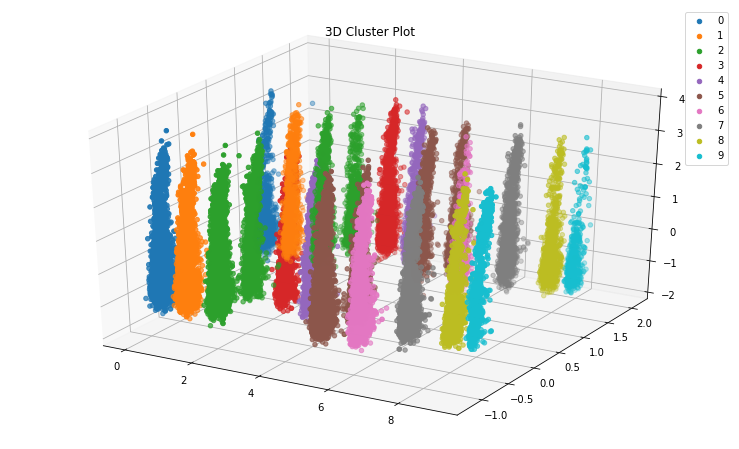

In [47]:
fig = plt.figure(figsize=[13,8])
kmeans = cluster.KMeans(n_clusters=10,random_state=12721667)
all_labels = kmeans.fit_predict(train_rd)   #labels for whole dataset
ax = fig.add_subplot(111,projection='3d')
for i in range(10):
    ax.scatter(i,train_rd[all_labels == i , 1],train_rd[all_labels == i ,0],label = i,cmap='tab10')
#plt.xlabel("First Dimension")
#plt.ylabel("Second Dimension")
plt.title("3D Cluster Plot")
plt.legend()
plt.show()

### Determing optimal k for clustering 

In [48]:
dist = [] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(train_rd) 
    dist.append(kmeans.inertia_)

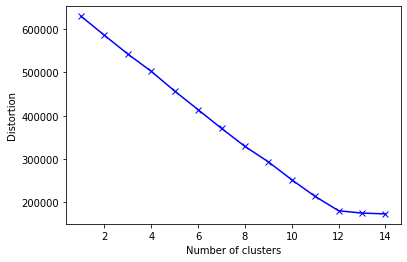

In [49]:
plt.plot(range(1, 15), dist,'b-x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') 
plt.show()

In [50]:
sil = []
kmax = 15
from tqdm import tqdm
for k in tqdm(range(2, kmax+1)):
  kmeans = KMeans(n_clusters = k).fit(train_rd)
  labels = kmeans.labels_
  sil.append(silhouette_score(train_rd, labels, metric = 'euclidean'))

100%|██████████| 14/14 [06:30<00:00, 27.91s/it]


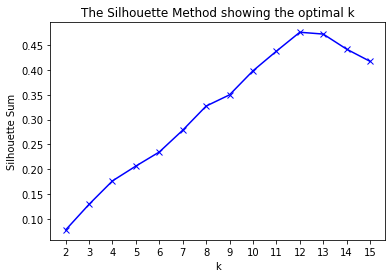

In [51]:
plt.plot(range(2,kmax+1), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Sum')
plt.title('The Silhouette Method showing the optimal k')
plt.xticks([i for i in range(2,kmax+1)])
plt.show()

In [52]:
print(f"The optimal k is {2+np.argmax(sil)}.")

The optimal k is 12.


In [53]:
train_rd = pd.DataFrame(train_rd,columns=[i for i in range (14)]) 
test_rd = pd.DataFrame(test_rd,columns=[i for i in range(14)])

In [54]:
test_rd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.949865,0.769433,2.094003,-0.151554,-1.440364,-1.975277,-0.778179,-0.049003,-0.810544,-0.338899,0.317716,0.081160,-0.134034,0.459550
1,-0.567291,-0.525875,0.922781,0.131202,-0.261171,0.375052,2.424070,-0.440219,-1.132280,0.177810,0.672304,0.192574,-0.811637,1.754369
2,-0.112392,-0.363159,0.886541,0.510845,-0.116854,0.030144,-0.095031,-0.218829,0.602138,-0.593641,-1.350553,3.476726,-0.399980,-0.610880
3,0.244868,1.685517,0.632428,0.387384,-0.008173,-0.179698,-0.611872,-0.751528,-0.947858,2.562982,-0.611686,-0.387557,0.056769,-1.514438
4,-0.835928,0.902424,1.579813,1.252580,0.084167,2.025954,-1.267454,-0.286829,-0.867184,-0.391477,0.040590,-0.104216,-0.625653,1.314138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.873076,1.104928,-1.566098,1.224657,0.281764,-0.371617,0.733300,0.469726,-0.322266,-0.535072,-0.804337,-0.500687,0.175383,-1.404311
4996,-0.469660,0.996631,-0.883898,-0.485805,-0.308094,0.453808,-0.105341,-0.278326,2.115684,1.404710,1.749133,0.616886,-0.519490,-0.848044
4997,-1.034389,-0.225696,-0.833198,0.304517,0.051457,-0.154939,-0.762329,-0.806898,-0.908457,2.580103,-0.448687,-0.569546,-0.068062,0.288757
4998,-1.010989,-0.589665,-1.291699,-1.708876,-0.748146,0.810383,2.446359,-0.454749,-0.678867,-0.091717,-0.208355,-0.445395,-0.348758,0.298780


In [55]:
train_rd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.432638,1.552731,-0.030094,-1.063016,0.353461,0.155486,-0.656796,-0.526320,-1.058728,-1.860207,2.070107,-0.034387,0.954913,-1.419968
1,-0.008441,0.990688,1.185851,0.193313,-0.369046,2.245383,-0.933617,-0.113214,-0.523087,-0.462139,-0.621396,-0.375193,0.028601,-1.354662
2,-0.534969,-0.977760,0.886985,0.443245,-0.069307,0.111750,-0.034107,-0.153227,1.879489,1.585262,2.415119,0.888807,-0.585194,0.586926
3,0.140195,-0.377125,0.715468,0.088345,-0.224118,0.024918,-0.019890,-0.139289,0.664538,-0.620181,-1.490810,3.296689,-0.208366,-0.882394
4,0.008808,1.046205,0.896502,0.559091,-0.244765,2.252592,-1.089121,-0.126222,-0.702971,-0.478852,-0.382859,-0.237715,-0.282524,-1.140276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.971674,-0.622311,-2.902880,1.785369,0.410707,-0.473972,0.712360,0.331252,-0.297251,-0.337569,-0.676506,-0.516252,-0.115008,0.102540
44996,-0.144293,-0.234266,-0.954621,0.272628,-0.149417,-0.057774,-0.755601,-0.929234,-0.714832,2.597158,-0.703087,-0.574461,-0.128067,-0.594684
44997,-0.759361,-0.919404,0.008926,0.538835,-0.456520,2.252978,-1.010167,-0.268265,-0.337790,-0.343180,-0.494259,-0.386414,-0.148478,-0.121993
44998,-0.401895,1.016194,-0.711597,-1.202086,2.212060,-0.399072,-0.205794,-0.477938,0.135064,-0.186092,-0.691253,-0.258123,-0.319852,-0.626446


### Adding the cluster feature

In [56]:
def get_clusters(X_train,X_test,n_clusters):
    clustering = KMeans(n_clusters=n_clusters,random_state=12721667)
    clustering.fit(X_train)
    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels

    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs,X_test_clstrs


In [57]:
train_clstrs, test_clstrs = get_clusters(train_rd, test_rd, 12)

In [58]:
train_clstrs.reset_index(drop=True)
test_clstrs.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,clusters
0,-0.949865,0.769433,2.094003,-0.151554,-1.440364,-1.975277,-0.778179,-0.049003,-0.810544,-0.338899,0.317716,0.081160,-0.134034,0.459550,2
1,-0.567291,-0.525875,0.922781,0.131202,-0.261171,0.375052,2.424070,-0.440219,-1.132280,0.177810,0.672304,0.192574,-0.811637,1.754369,7
2,-0.112392,-0.363159,0.886541,0.510845,-0.116854,0.030144,-0.095031,-0.218829,0.602138,-0.593641,-1.350553,3.476726,-0.399980,-0.610880,8
3,0.244868,1.685517,0.632428,0.387384,-0.008173,-0.179698,-0.611872,-0.751528,-0.947858,2.562982,-0.611686,-0.387557,0.056769,-1.514438,10
4,-0.835928,0.902424,1.579813,1.252580,0.084167,2.025954,-1.267454,-0.286829,-0.867184,-0.391477,0.040590,-0.104216,-0.625653,1.314138,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.873076,1.104928,-1.566098,1.224657,0.281764,-0.371617,0.733300,0.469726,-0.322266,-0.535072,-0.804337,-0.500687,0.175383,-1.404311,0
4996,-0.469660,0.996631,-0.883898,-0.485805,-0.308094,0.453808,-0.105341,-0.278326,2.115684,1.404710,1.749133,0.616886,-0.519490,-0.848044,6
4997,-1.034389,-0.225696,-0.833198,0.304517,0.051457,-0.154939,-0.762329,-0.806898,-0.908457,2.580103,-0.448687,-0.569546,-0.068062,0.288757,10
4998,-1.010989,-0.589665,-1.291699,-1.708876,-0.748146,0.810383,2.446359,-0.454749,-0.678867,-0.091717,-0.208355,-0.445395,-0.348758,0.298780,7


In [59]:
train_clstrs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,clusters
0,-0.432638,1.552731,-0.030094,-1.063016,0.353461,0.155486,-0.656796,-0.526320,-1.058728,-1.860207,2.070107,-0.034387,0.954913,-1.419968,11
1,-0.008441,0.990688,1.185851,0.193313,-0.369046,2.245383,-0.933617,-0.113214,-0.523087,-0.462139,-0.621396,-0.375193,0.028601,-1.354662,5
2,-0.534969,-0.977760,0.886985,0.443245,-0.069307,0.111750,-0.034107,-0.153227,1.879489,1.585262,2.415119,0.888807,-0.585194,0.586926,6
3,0.140195,-0.377125,0.715468,0.088345,-0.224118,0.024918,-0.019890,-0.139289,0.664538,-0.620181,-1.490810,3.296689,-0.208366,-0.882394,8
4,0.008808,1.046205,0.896502,0.559091,-0.244765,2.252592,-1.089121,-0.126222,-0.702971,-0.478852,-0.382859,-0.237715,-0.282524,-1.140276,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.971674,-0.622311,-2.902880,1.785369,0.410707,-0.473972,0.712360,0.331252,-0.297251,-0.337569,-0.676506,-0.516252,-0.115008,0.102540,0
44996,-0.144293,-0.234266,-0.954621,0.272628,-0.149417,-0.057774,-0.755601,-0.929234,-0.714832,2.597158,-0.703087,-0.574461,-0.128067,-0.594684,10
44997,-0.759361,-0.919404,0.008926,0.538835,-0.456520,2.252978,-1.010167,-0.268265,-0.337790,-0.343180,-0.494259,-0.386414,-0.148478,-0.121993,5
44998,-0.401895,1.016194,-0.711597,-1.202086,2.212060,-0.399072,-0.205794,-0.477938,0.135064,-0.186092,-0.691253,-0.258123,-0.319852,-0.626446,1


### Neural Network Classification

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from IPython import display

In [61]:
def calc_accr(y_pred,y_true):
    score,predicted = torch.max(y_pred,1)
    acc = (predicted == y_true).sum().float()/len(y_true)
    return acc

In [62]:
len(y_train),len(y_test)

(45000, 5000)

In [63]:
X_train = train_clstrs.to_numpy()
X_test = test_clstrs.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [65]:
X_train_ts = torch.from_numpy(X_train).float().to(device)
X_test_ts = torch.from_numpy(X_test).float().to(device)
y_train_ts = torch.from_numpy(y_train).type(torch.LongTensor).to(device)
y_test_ts = torch.from_numpy(y_test).type(torch.LongTensor).to(device)

In [66]:
input_size = 15
output_size = 10
hidden_size = 150
lr_rate = 1e-1
reg_coef = 1e-3

### Try one-hidden and two-hidden layer Neural Network Models

In [67]:
model_seq = ['sigmoid','relu','tanh']

In [68]:
from collections import defaultdict
models_auc = defaultdict(list)
one_auc = {'relu':0,'tanh':0,'sigmoid':0}
two_auc = {'relu':0,'tanh':0,'sigmoid':0}
one_hidden = []
two_hidden = []

for i in range(3):
    model = nn.Sequential(
        nn.Linear(input_size,hidden_size),
        nn.ReLU() if i==1 else nn.Tanh() if i==2 else nn.Sigmoid(),
        nn.Linear(hidden_size,output_size)
    )
    model = model.to(device)
    one_hidden.append(model)
    print(model)

for i in range(3):
    model = nn.Sequential(
        nn.Linear(input_size,hidden_size),
        nn.ReLU() if i == 1 else nn.Tanh() if i == 2 else nn.Sigmoid(),
        nn.Linear(hidden_size,hidden_size),
        nn.ReLU() if i == 1 else nn.Tanh() if i == 2 else nn.Sigmoid(),
        nn.Linear(hidden_size,output_size)
    )
    model = model.to(device)
    two_hidden.append(model)
    print(model)


Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=150, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): ReLU()
  (2): Linear(in_features=150, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): Tanh()
  (2): Linear(in_features=150, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=150, out_features=150, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=150, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): ReLU()
  (2): Linear(in_features=150, out_features=150, bias=True)
  (3): ReLU()
  (4): Linear(in_features=150, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): Tanh()
  (2): Linear(in_features=15

In [69]:
criterion = torch.nn.CrossEntropyLoss()
for mod in range(len(one_hidden)):
    model = one_hidden[mod]
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate,weight_decay=reg_coef)

    for i in range(1001):
        y_pred = model(X_train_ts)
        loss = criterion(y_pred,y_train_ts)
        score,predicted = torch.max(y_pred,1)
        acc = (y_train_ts == predicted).sum().float() / len(y_train_ts)
        print(f"[EPOCH]: {i}, [LOSS]: {loss.item():.2f}, [ACCURACY]: {acc*100:.2f}%")
        display.clear_output(wait=True)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

for mod in range(len(two_hidden)):
    model = two_hidden[mod]
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate,weight_decay=reg_coef)

    for i in range(1001):
        y_pred = model(X_train_ts)
        loss = criterion(y_pred,y_train_ts)
        score,predicted = torch.max(y_pred,1)
        acc = (y_train_ts == predicted).sum().float() / len(y_train_ts)
        print(f"[EPOCH]: {i}, [LOSS]: {loss.item():.2f}, [ACCURACY]: {acc*100:.2f}%")
        display.clear_output(wait=True)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

[EPOCH]: 1000, [LOSS]: 1.62, [ACCURACY]: 37.38%


In [70]:
classes = [i for i in range(10)]

for mod in range(len(one_hidden)):
    model = one_hidden[mod]
    model.eval()
    with torch.no_grad():
        y_pred_ts = model(X_test_ts)
        score,predicted = torch.max(y_pred_ts,1)
        acc = (y_test_ts == predicted).sum().float() / len(y_test_ts)
        print(f"Accuracy of the model is {acc*100:.2f}%")
        y_proba = F.softmax(y_pred_ts,dim=1)
        auroc = roc_auc_score(y_test, y_proba.cpu().numpy(), labels = classes, multi_class = 'ovr', average = 'macro')
        model_key = model_seq[mod]
        one_auc[model_key] = auroc
models_auc['one_layer'] = one_auc

for mod in range(len(two_hidden)):
    model = two_hidden[mod]
    model.eval()
    with torch.no_grad():
        y_pred_ts = model(X_test_ts)
        score,predicted = torch.max(y_pred_ts,1)
        acc = (y_test_ts == predicted).sum().float() / len(y_test_ts)
        print(f"Accuracy of the model is {acc*100:.2f}%")
        y_proba = F.softmax(y_pred_ts,dim=1)
        auroc = roc_auc_score(y_test, y_proba.cpu().numpy(), labels = classes, multi_class = 'ovr', average = 'macro')
        model_key = model_seq[mod]
        two_auc[model_key] = auroc
models_auc['two_layer'] = two_auc



Accuracy of the model is 34.46%
Accuracy of the model is 38.48%
Accuracy of the model is 37.36%
Accuracy of the model is 31.34%
Accuracy of the model is 40.12%
Accuracy of the model is 38.00%


In [78]:
models_auc

defaultdict(list,
            {'one_layer': {'relu': 0.8392835777777778,
              'sigmoid': 0.8059914666666665,
              'tanh': 0.8245668888888888},
             'two_layer': {'relu': 0.8464959555555556,
              'sigmoid': 0.7834593333333333,
              'tanh': 0.8373469555555555}})

### Therefore, 2-hidden layer relu has the highest auc around 0.866

In [72]:
model = nn.Sequential(
    nn.Linear(input_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,output_size)
)
model = model.to(device)
print(model)

Sequential(
  (0): Linear(in_features=15, out_features=150, bias=True)
  (1): ReLU()
  (2): Linear(in_features=150, out_features=150, bias=True)
  (3): ReLU()
  (4): Linear(in_features=150, out_features=150, bias=True)
  (5): ReLU()
  (6): Linear(in_features=150, out_features=10, bias=True)
)


In [73]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate,weight_decay=reg_coef)
model.train()
    

for i in range(1001):
    y_pred = model(X_train_ts)
    loss = criterion(y_pred,y_train_ts)
    score,predicted = torch.max(y_pred,1)
    acc = (y_train_ts == predicted).sum().float() / len(y_train_ts)
    print(f"[EPOCH]: {i}, [LOSS]: {loss.item():.2f}, [ACCURACY]: {acc*100:.2f}%")
    display.clear_output(wait=True)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


[EPOCH]: 1000, [LOSS]: 1.55, [ACCURACY]: 40.46%


In [74]:
model.eval()
with torch.no_grad():
    y_pred_ts = model(X_test_ts)
    score,predicted = torch.max(y_pred_ts,1)
    acc = (y_test_ts == predicted).sum().float() / len(y_test_ts)
    print(f"Accuracy of the model is {acc*100:.2f}%")
    y_proba = F.softmax(y_pred_ts,dim=1)
    auroc = roc_auc_score(y_test, y_proba.cpu().numpy(), labels = classes, multi_class = 'ovr', average = 'macro')
    print(f"Two-hidden layer ReLU model has an auc of {auroc}.")

Accuracy of the model is 39.52%
Two-hidden layer ReLU model has an auc of 0.8523654444444444.


### ROC Curves

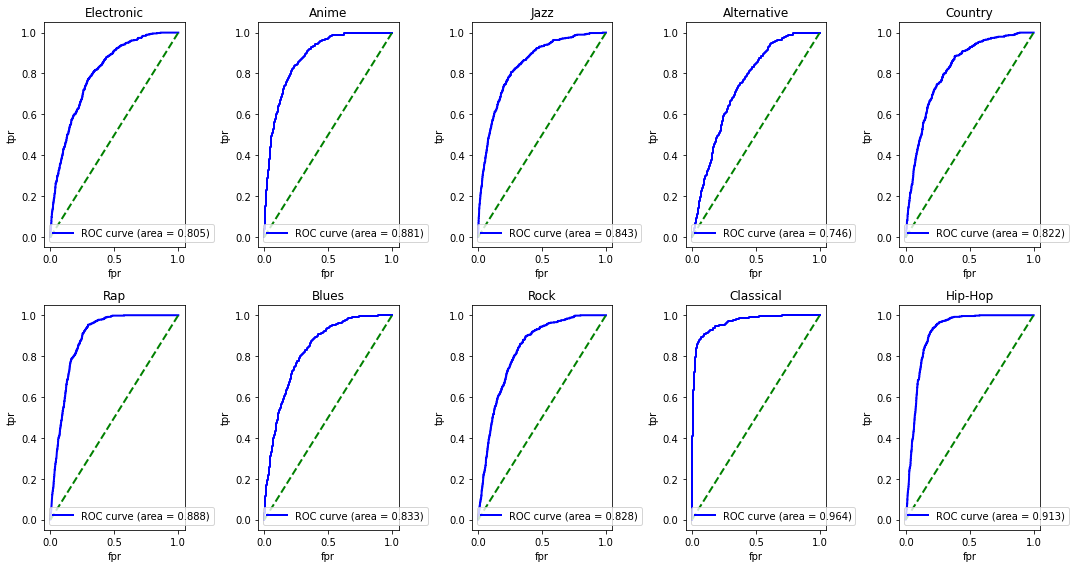

In [75]:
plt.figure(figsize = (15, 8))
#bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
classes = [i for i in range(10)]

for i in range(len(classes)):
    # Gets the current class i
    c = classes[i]
    class_np = np.array([1 if y == c else 0 for y in y_test])
    proba = y_proba.cpu().numpy()[:, i]

    ax_bottom = plt.subplot(2, 5, i+1)
    fpr, tpr, _ = roc_curve(class_np, proba)
    auc_i = roc_auc_score(class_np,proba)
    roc_auc_ovr[i] = auc_i
    ax_bottom.plot(fpr,tpr,color='blue',lw=2,label=f"ROC curve (area = {auc_i:.3f})")
    ax_bottom.plot([0, 1], [0, 1], linestyle='--', lw=2, color='green')
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    class_name = None
    for key,value in genre_encode.items():
        if value == i:
            class_name = key
            break
    ax_bottom.set_title(f"{class_name}")
    plt.legend(loc='best')

plt.tight_layout()

In [76]:
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    class_name = None
    for key,value in genre_encode.items():
        if value == k:
            class_name = key
            break
    print(f"{class_name} genre ROC AUC OvR: {roc_auc_ovr[k]:.3f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.3f}")

Electronic genre ROC AUC OvR: 0.805
Anime genre ROC AUC OvR: 0.881
Jazz genre ROC AUC OvR: 0.843
Alternative genre ROC AUC OvR: 0.746
Country genre ROC AUC OvR: 0.822
Rap genre ROC AUC OvR: 0.888
Blues genre ROC AUC OvR: 0.833
Rock genre ROC AUC OvR: 0.828
Classical genre ROC AUC OvR: 0.964
Hip-Hop genre ROC AUC OvR: 0.913
Average ROC AUC OvR: 0.852


### AUC score information

In [77]:
models_auc

defaultdict(list,
            {'one_layer': {'relu': 0.8392835777777778,
              'sigmoid': 0.8059914666666665,
              'tanh': 0.8245668888888888},
             'two_layer': {'relu': 0.8464959555555556,
              'sigmoid': 0.7834593333333333,
              'tanh': 0.8373469555555555}})